In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv ('cleaned dataset.csv', dtype=str)
df

,date,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Rain,city_name
0,2023-11-06,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0,Caloocan City
1,2023-11-06,30.0,1009.0,74.0,81.0,2.06,0.0,1.0,0.0,Malabon
2,2023-11-06,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0,Navotas
3,2023-11-06,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0,Valenzuela
4,2023-11-06,31.1,1010.0,72.0,20.0,4.12,0.0,1.0,0.0,Caloocan City
...,...,...,...,...,...,...,...,...,...,...
415,2023-11-23,26.94,1012.0,88.0,99.0,2.5,0.0,0.0,1.0,Valenzuela
416,2023-11-24,27.12,1012.0,91.0,75.0,1.54,0.0,1.0,0.0,Caloocan City
417,2023-11-24,26.03,1011.0,82.0,55.0,1.9,0.0,1.0,0.0,Malabon
418,2023-11-24,27.13,1012.0,91.0,100.0,1.03,0.0,1.0,0.0,Navotas


In [3]:

# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp'])

# Separate temperature column into weather_y
camanava_y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)
#camanava_y.head()


Shape of camanava_x: (420, 9)
Shape of camanava_y: (420, 1)


In [4]:
camanava_x.columns

Index(['date', 'main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain', 'city_name'],
      dtype='object')

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain'],
      dtype='object')


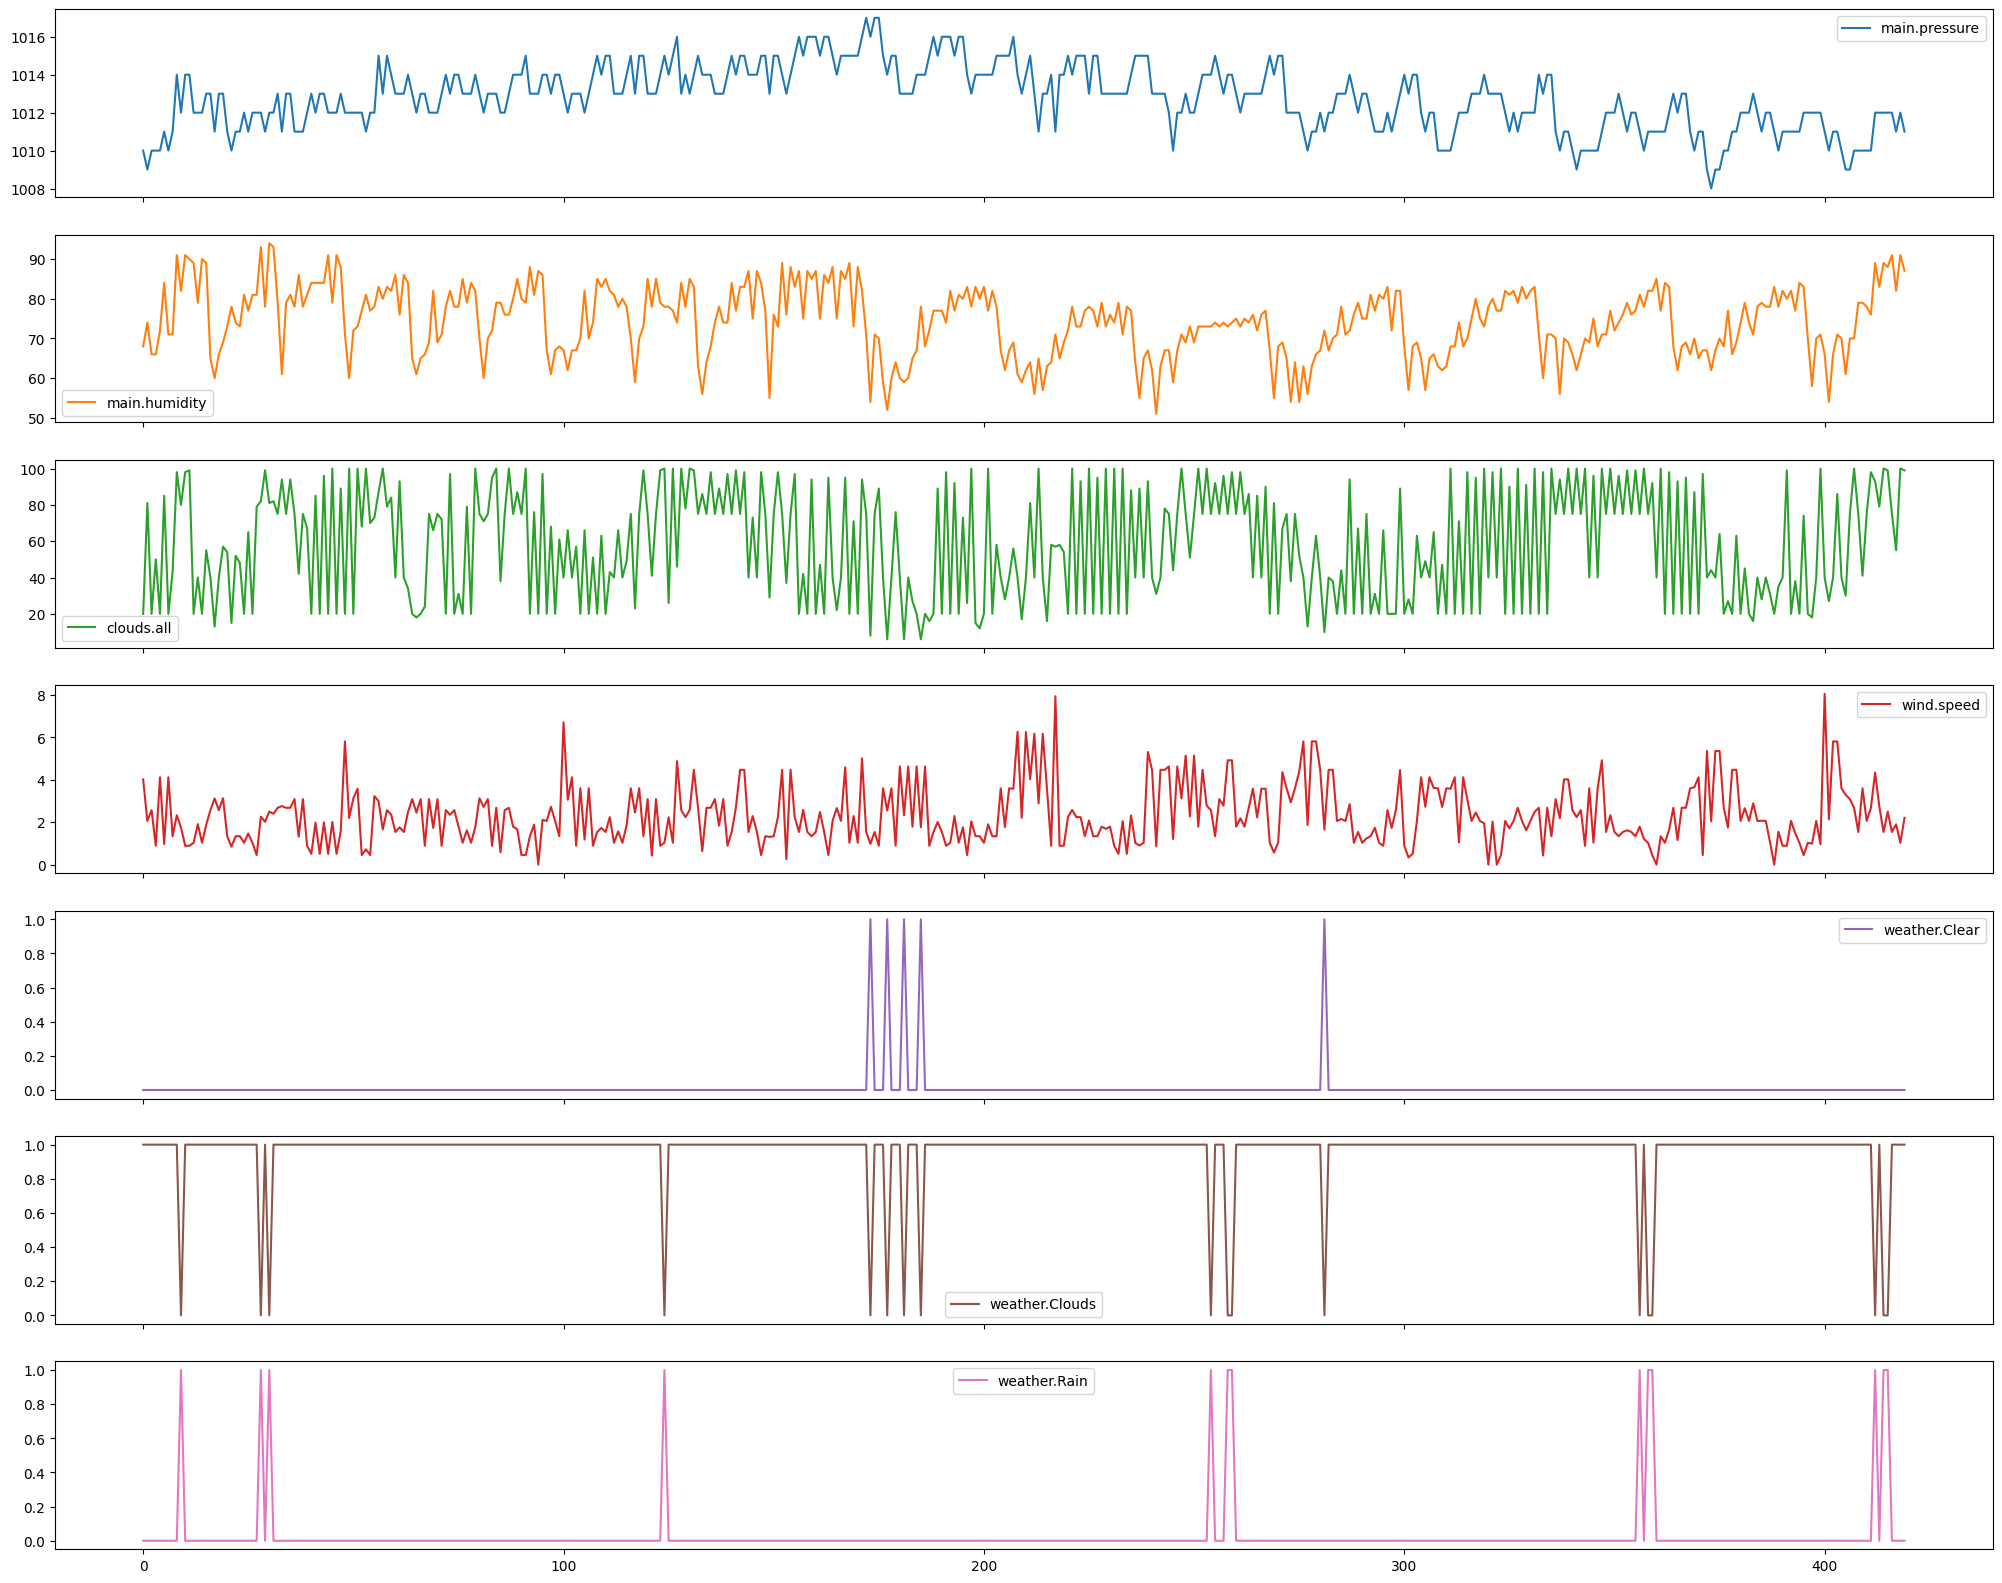

In [5]:
import matplotlib.pyplot as plt
camanava_xnum = camanava_x.apply(pd.to_numeric, errors='ignore')
# Select only numerical features 
camanava_features = camanava_xnum .select_dtypes(include=['float64', 'int64'])
print(camanava_features.columns)
# Plot all features in separate subplots
camanava_features .plot(subplots=True, figsize=(25, 20))
plt.show()
